<h2>Team NameError - ADA Project milestone 2

**Sentiment analysis over time**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Supresses warnings
pd.options.mode.chained_assignment = None

sns.set_theme(style = "white")

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# nltk
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# custom function
from functions import *

# nltk.download('stopwords')
# nltk.download('punct')
# nltk.download('brown')

# dir paths
DATA_DIR = '../data'
IMG_DIR = '../img'
RAW_DATA_DIR = "../raw_data/"

In [3]:
# loading the data
df = pd.read_json(f'{DATA_DIR}/quotebank_attr_2015-2020.json.bz2', compression='bz2')

In [4]:
df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains
0,2015-10-05-010038,At Neath Food Festival with a vegetarian platt...,Bethan Jenkins,[Q4897688],2015-10-05 05:00:00,1,"[[Bethan Jenkins, 0.8565], [None, 0.1435]]",[http://www.southwales-eveningpost.co.uk/Town-...,E,Q4897688,None,None,None,None,None,None,None,[southwales-eveningpost.co.uk]
1,2015-11-28-006688,"But if I had to choose my favourite recipe, it...",Trish Deseine,[Q7843986],2015-11-28 00:00:00,1,"[[Trish Deseine, 0.7664], [None, 0.1125], [Kei...",[http://www.irishexaminer.com/lifestyle/featur...,E,Q7843986,None,None,None,None,None,None,None,[irishexaminer.com]
2,2015-11-10-015422,"Children are learning about responsibility, te...",David Price,"[Q1176177, Q16063598, Q20804677, Q20973688, Q3...",2015-11-10 19:30:41,1,"[[David Price, 0.7849], [None, 0.2151]]",[http://news.ifas.ufl.edu/2015/11/ufifas-bok-t...,E,None,None,None,None,None,None,None,None,[ufl.edu]
3,2015-01-16-054273,Once we have added all the vegetables and stoc...,None,[],2015-01-16 11:40:11,4,"[[None, 0.6778], [Catherine O'Neill, 0.3222]]",[http://www.bromsgrovestandard.co.uk/2015/01/1...,E,None,None,None,None,None,None,None,None,"[bromsgrovestandard.co.uk, bromsgrovestandard...."
4,2015-02-20-089622,vegans in a steakhouse.,Jim Gaffigan,[Q2093638],2015-02-20 00:05:44,1,"[[Jim Gaffigan, 0.7894], [None, 0.2106]]",[http://unfspinnaker.com/expect-jim-gaffigans-...,E,Q2093638,[male],[United States of America],[+1966-07-07T00:00:00Z],None,"[screenwriter, film producer, television actor...",None,None,[unfspinnaker.com]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66579,2020-02-20-028821,I suppose because of my size and what I do for...,None,[],2020-02-20 19:00:00,2,"[[None, 0.7036], [Anthony Mullally, 0.2063], [...",[https://www.stuff.co.nz/sport/league/11967886...,E,None,None,None,None,None,None,None,None,"[stuff.co.nz, nzcity.co.nz]"
66580,2020-01-23-046052,In the early 2000s the City of Cedar Rapids wa...,Jason Andrews,"[Q22704361, Q55523316]",2020-01-23 13:00:05,1,"[[Jason Andrews, 0.8019], [None, 0.1981]]",[https://adventure.howstuffworks.com/outdoor-a...,E,None,None,None,None,None,None,None,None,[howstuffworks.com]
66581,2020-03-26-047830,People have mostly stayed in the last couple o...,Arvind Kejriwal,[Q59155],2020-03-26 09:10:20,2,"[[Arvind Kejriwal, 0.6215], [None, 0.3786]]",[https://www.newindianexpress.com/cities/delhi...,E,Q59155,[male],[India],[+1968-08-16T00:00:00Z],None,"[politician, bureaucrat]",[Aam Aadmi Party],None,"[newindianexpress.com, newkerala.com]"
66582,2020-04-04-035826,We have been seeing reports of farmers dumping...,Narayana Gowda,[Q6965507],2020-04-04 00:38:36,1,"[[Narayana Gowda, 0.8262], [None, 0.1738]]",[http://www.bangaloremirror.com/bangalore/othe...,E,Q6965507,[male],[India],[+1966-06-10T00:00:00Z],None,"[politician, activist]",[Janata Dal (Secular)],None,[bangaloremirror.com]


In [5]:
preprocess_dataframe(df)

In [6]:
df.dtypes

quoteID                    object
quotation                  object
speaker                    object
qids                       object
date               datetime64[ns]
numOccurrences              int64
probas                     object
urls                       object
phase                      object
speaker_qid                object
gender                     object
nationality                object
date_of_birth              object
ethnic_group               object
occupation                 object
party                      object
academic_degree            object
domains                    object
dtype: object

Firstly, let's count the number of all quotes per year and plot them.

In [10]:
df['date'].dt.year.value_counts()

2018    16064
2019    15204
2017    14205
2015     9869
2016     6970
2020     4272
Name: date, dtype: int64

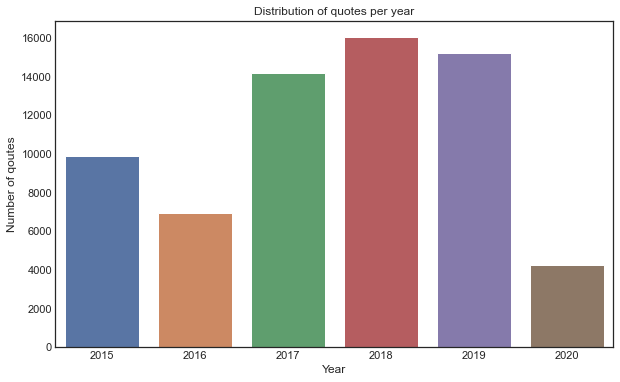

In [34]:
# plotting the number of all quotes per year

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x=df['date'].dt.year, ax=ax)

ax.set(title='Distribution of quotes per year')
plt.xlabel('Year')
plt.ylabel('Number of qoutes')

plt.show()

Sentiment analysis comes in the following cells.

In [14]:
sentiment_analyzer = SentimentIntensityAnalyzer()

df['sentiment'] = df.apply(lambda row: get_sentiment(sentiment_analyzer, row.quotation), axis=1)

In [15]:
df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains,sentiment
0,2015-10-05-010038,At Neath Food Festival with a vegetarian platt...,Bethan Jenkins,[Q4897688],2015-10-05 05:00:00,1,"[[Bethan Jenkins, 0.8565], [None, 0.1435]]",[http://www.southwales-eveningpost.co.uk/Town-...,E,Q4897688,None,None,None,None,None,None,None,[southwales-eveningpost.co.uk],positive
1,2015-11-28-006688,"But if I had to choose my favourite recipe, it...",Trish Deseine,[Q7843986],2015-11-28 00:00:00,1,"[[Trish Deseine, 0.7664], [None, 0.1125], [Kei...",[http://www.irishexaminer.com/lifestyle/featur...,E,Q7843986,None,None,None,None,None,None,None,[irishexaminer.com],neutral
2,2015-11-10-015422,"Children are learning about responsibility, te...",David Price,"[Q1176177, Q16063598, Q20804677, Q20973688, Q3...",2015-11-10 19:30:41,1,"[[David Price, 0.7849], [None, 0.2151]]",[http://news.ifas.ufl.edu/2015/11/ufifas-bok-t...,E,None,None,None,None,None,None,None,None,[ufl.edu],positive
3,2015-01-16-054273,Once we have added all the vegetables and stoc...,NaN,[],2015-01-16 11:40:11,4,"[[None, 0.6778], [Catherine O'Neill, 0.3222]]",[http://www.bromsgrovestandard.co.uk/2015/01/1...,E,None,None,None,None,None,None,None,None,"[bromsgrovestandard.co.uk, bromsgrovestandard....",positive
4,2015-02-20-089622,vegans in a steakhouse.,Jim Gaffigan,[Q2093638],2015-02-20 00:05:44,1,"[[Jim Gaffigan, 0.7894], [None, 0.2106]]",[http://unfspinnaker.com/expect-jim-gaffigans-...,E,Q2093638,[male],[United States of America],[+1966-07-07T00:00:00Z],None,"[screenwriter, film producer, television actor...",None,None,[unfspinnaker.com],neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66579,2020-02-20-028821,I suppose because of my size and what I do for...,NaN,[],2020-02-20 19:00:00,2,"[[None, 0.7036], [Anthony Mullally, 0.2063], [...",[https://www.stuff.co.nz/sport/league/11967886...,E,None,None,None,None,None,None,None,None,"[stuff.co.nz, nzcity.co.nz]",positive
66580,2020-01-23-046052,In the early 2000s the City of Cedar Rapids wa...,Jason Andrews,"[Q22704361, Q55523316]",2020-01-23 13:00:05,1,"[[Jason Andrews, 0.8019], [None, 0.1981]]",[https://adventure.howstuffworks.com/outdoor-a...,E,None,None,None,None,None,None,None,None,[howstuffworks.com],positive
66581,2020-03-26-047830,People have mostly stayed in the last couple o...,Arvind Kejriwal,[Q59155],2020-03-26 09:10:20,2,"[[Arvind Kejriwal, 0.6215], [None, 0.3786]]",[https://www.newindianexpress.com/cities/delhi...,E,Q59155,[male],[India],[+1968-08-16T00:00:00Z],None,"[politician, bureaucrat]",[Aam Aadmi Party],None,"[newindianexpress.com, newkerala.com]",positive
66582,2020-04-04-035826,We have been seeing reports of farmers dumping...,Narayana Gowda,[Q6965507],2020-04-04 00:38:36,1,"[[Narayana Gowda, 0.8262], [None, 0.1738]]",[http://www.bangaloremirror.com/bangalore/othe...,E,Q6965507,[male],[India],[+1966-06-10T00:00:00Z],None,"[politician, activist]",[Janata Dal (Secular)],None,[bangaloremirror.com],negative


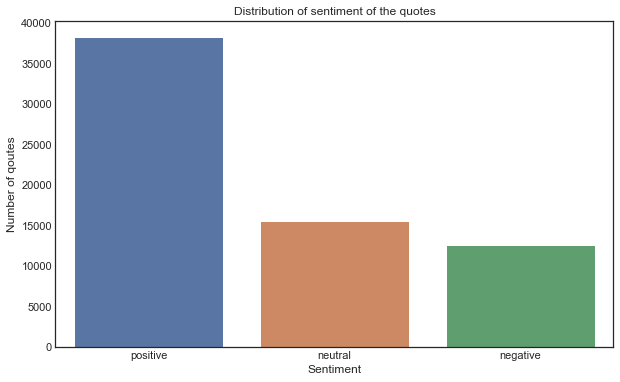

In [35]:
# plotting the overall distribution of sentiment over the quotes

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', ax=ax)

ax.set(title='Distribution of sentiment of the quotes')
plt.xlabel('Sentiment')
plt.ylabel('Number of qoutes')

plt.show()

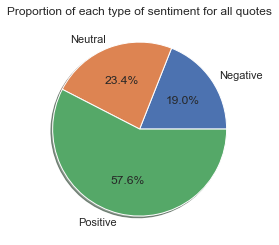

In [82]:
# making a pie chart

pos = df[df['sentiment'] == 'positive']['quoteID'].count()
neg = df[df['sentiment'] == 'negative']['quoteID'].count()
neu = df[df['sentiment'] == 'neutral']['quoteID'].count()

labels = ('Negative','Neutral', 'Positive')
plt.pie([neg, neu, pos], labels=labels, shadow=True, autopct='%1.1f%%')
plt.title('Proportion of each type of sentiment for all quotes')
plt.show()

In [30]:
# counting the number of each type of sentiment for each year

time_distribution_year = pd.pivot_table(
    df.sort_values('date'),
    columns=['sentiment'],
    index=df['date'].dt.year,
    aggfunc=len
)['numOccurrences'].fillna(0) # numOccurrences irrelevant in the context, any column other than date would suffice

time_distribution_year

sentiment,negative,neutral,positive
date,,,
2015,1829,2383,5657
2016,1310,1705,3955
2017,2698,3329,8178
2018,3087,3718,9259
2019,2875,3513,8816
2020,865,948,2459


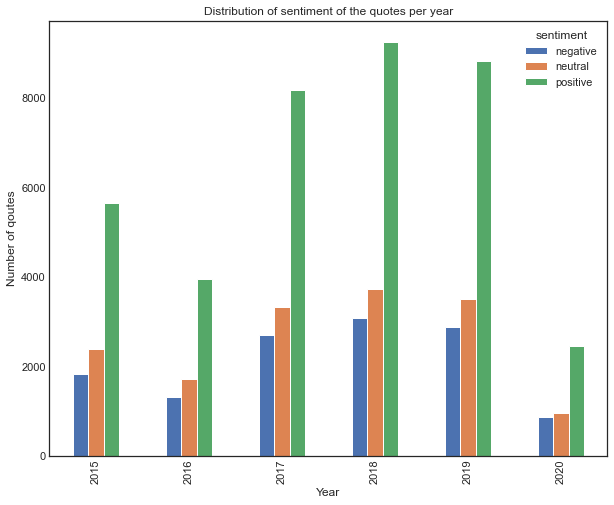

In [36]:
# plotting the number of each type of sentiment for each year

fig, ax = plt.subplots(figsize=(10, 8))
time_distribution_year.plot.bar(ax=ax)

ax.set(title='Distribution of sentiment of the quotes per year')
plt.xlabel('Year')
plt.ylabel('Number of qoutes')

plt.show()

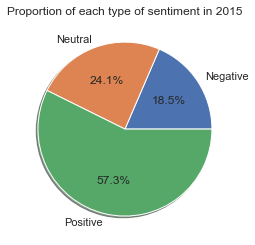

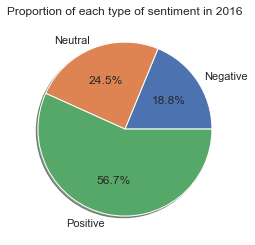

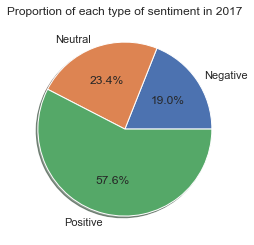

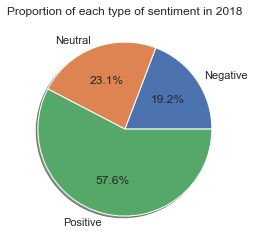

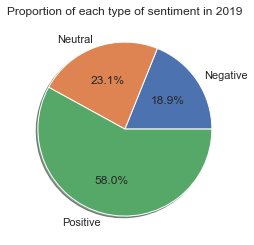

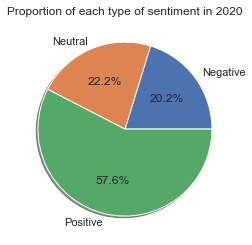

In [86]:
# making pie charts

k=2015
for i in range(0, 6):    
    labels = ('Negative','Neutral', 'Positive')
    plt.pie(time_distribution_year.iloc[i], labels=labels, shadow=True, autopct='%1.1f%%')
    plt.title(f'Proportion of each type of sentiment in {k}')
    k+=1
    plt.show()

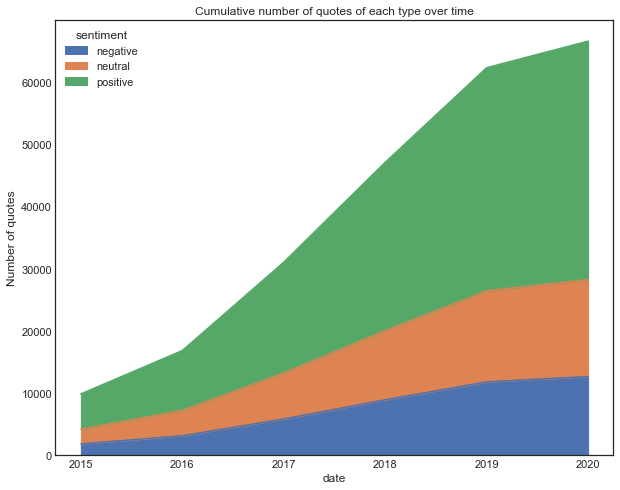

In [31]:
# plotting the trend in sentiments change over years

fig, ax = plt.subplots(figsize=(10, 8))
plt.style.use('seaborn-white')

ax.set(title='Cumulative number of quotes of each type over time', xlabel='Date', ylabel='Number of quotes')
time_distribution_year.cumsum().plot.area(ax=ax)
plt.show()

*I'm not sure if we need the following two cells*

In [27]:
# the same but for smaller step in time (smoother) 

time_distribution = pd.pivot_table(
    df.sort_values('date'),
    columns=['sentiment'],
    index=df['date'],
    aggfunc=len
)['numOccurrences'].fillna(0) # numOccurrences irrelevant in the context, any column other than date would suffice

time_distribution

sentiment,negative,neutral,positive
date,,,
2015-01-01 00:51:41,0.0,1.0,1.0
2015-01-01 05:00:00,0.0,0.0,1.0
2015-01-01 07:00:07,0.0,0.0,1.0
2015-01-01 08:00:00,0.0,0.0,1.0
2015-01-01 08:10:59,0.0,0.0,1.0
...,...,...,...
2020-04-16 18:12:00,0.0,0.0,1.0
2020-04-16 19:27:40,1.0,0.0,0.0
2020-04-16 19:27:49,0.0,2.0,1.0


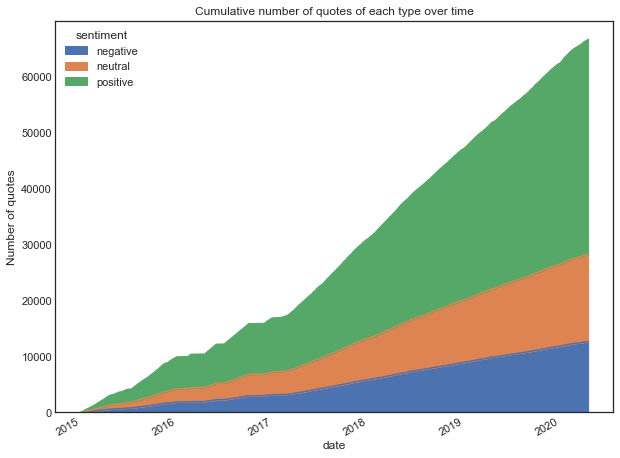

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.style.use('seaborn-white')

ax.set(title='Cumulative number of quotes of each type over time', xlabel='Date', ylabel='Number of quotes')
time_distribution.cumsum().plot.area(ax=ax)
plt.show()

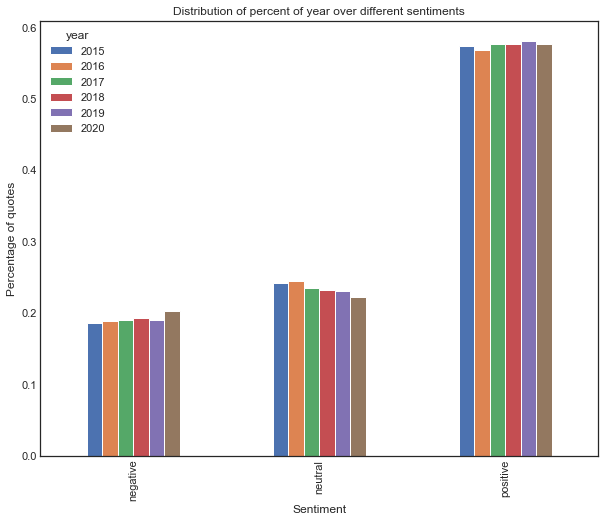

In [22]:
# plotting the percentage of each type of sentiment per year

df_filt = pd.DataFrame({'year': df['date'].dt.year,
                       'sentiment': df['sentiment']})

fig, ax = plt.subplots(figsize=(10, 8))
plot_sentiment_attribute_percentage(df_filt, 'year', ax=ax)
ax.set(title='Distribution of percent of year over different sentiments',
      ylabel='Percentage of quotes',
      xlabel='Sentiment')
plt.show()

Let's calculate the mean of sentiment scores per year

In [95]:
def get_sentiment_score(analyzer, sentence):
    compound = analyzer.polarity_scores(sentence)['compound']
    return compound

In [96]:
df['sentiment_score'] = df.apply(lambda row: get_sentiment_score(sentiment_analyzer, row.quotation), axis=1)

In [97]:
df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains,sentiment,sentiment_score
0,2015-10-05-010038,At Neath Food Festival with a vegetarian platt...,Bethan Jenkins,[Q4897688],2015-10-05 05:00:00,1,"[[Bethan Jenkins, 0.8565], [None, 0.1435]]",[http://www.southwales-eveningpost.co.uk/Town-...,E,Q4897688,None,None,None,None,None,None,None,[southwales-eveningpost.co.uk],positive,0.5707
1,2015-11-28-006688,"But if I had to choose my favourite recipe, it...",Trish Deseine,[Q7843986],2015-11-28 00:00:00,1,"[[Trish Deseine, 0.7664], [None, 0.1125], [Kei...",[http://www.irishexaminer.com/lifestyle/featur...,E,Q7843986,None,None,None,None,None,None,None,[irishexaminer.com],neutral,0.0000
2,2015-11-10-015422,"Children are learning about responsibility, te...",David Price,"[Q1176177, Q16063598, Q20804677, Q20973688, Q3...",2015-11-10 19:30:41,1,"[[David Price, 0.7849], [None, 0.2151]]",[http://news.ifas.ufl.edu/2015/11/ufifas-bok-t...,E,None,None,None,None,None,None,None,None,[ufl.edu],positive,0.8020
3,2015-01-16-054273,Once we have added all the vegetables and stoc...,NaN,[],2015-01-16 11:40:11,4,"[[None, 0.6778], [Catherine O'Neill, 0.3222]]",[http://www.bromsgrovestandard.co.uk/2015/01/1...,E,None,None,None,None,None,None,None,None,"[bromsgrovestandard.co.uk, bromsgrovestandard....",positive,0.8004
4,2015-02-20-089622,vegans in a steakhouse.,Jim Gaffigan,[Q2093638],2015-02-20 00:05:44,1,"[[Jim Gaffigan, 0.7894], [None, 0.2106]]",[http://unfspinnaker.com/expect-jim-gaffigans-...,E,Q2093638,[male],[United States of America],[+1966-07-07T00:00:00Z],None,"[screenwriter, film producer, television actor...",None,None,[unfspinnaker.com],neutral,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66579,2020-02-20-028821,I suppose because of my size and what I do for...,NaN,[],2020-02-20 19:00:00,2,"[[None, 0.7036], [Anthony Mullally, 0.2063], [...",[https://www.stuff.co.nz/sport/league/11967886...,E,None,None,None,None,None,None,None,None,"[stuff.co.nz, nzcity.co.nz]",positive,0.4753
66580,2020-01-23-046052,In the early 2000s the City of Cedar Rapids wa...,Jason Andrews,"[Q22704361, Q55523316]",2020-01-23 13:00:05,1,"[[Jason Andrews, 0.8019], [None, 0.1981]]",[https://adventure.howstuffworks.com/outdoor-a...,E,None,None,None,None,None,None,None,None,[howstuffworks.com],positive,0.2263
66581,2020-03-26-047830,People have mostly stayed in the last couple o...,Arvind Kejriwal,[Q59155],2020-03-26 09:10:20,2,"[[Arvind Kejriwal, 0.6215], [None, 0.3786]]",[https://www.newindianexpress.com/cities/delhi...,E,Q59155,[male],[India],[+1968-08-16T00:00:00Z],None,"[politician, bureaucrat]",[Aam Aadmi Party],None,"[newindianexpress.com, newkerala.com]",positive,0.5023
66582,2020-04-04-035826,We have been seeing reports of farmers dumping...,Narayana Gowda,[Q6965507],2020-04-04 00:38:36,1,"[[Narayana Gowda, 0.8262], [None, 0.1738]]",[http://www.bangaloremirror.com/bangalore/othe...,E,Q6965507,[male],[India],[+1966-06-10T00:00:00Z],None,"[politician, activist]",[Janata Dal (Secular)],None,[bangaloremirror.com],negative,-0.6808


In [115]:
# calculating the mean values

means = df.groupby(df['date'].dt.year)['sentiment_score'].mean()
data = pd.DataFrame({'year': df['date'].dt.year.unique(), 
                     'mean_sentiment_score': means})
data

,year,mean_sentiment_score
date,,
2015,2015,0.250102
2016,2016,0.243190
2017,2017,0.248575
2018,2018,0.252625
2019,2019,0.256844
2020,2020,0.240448


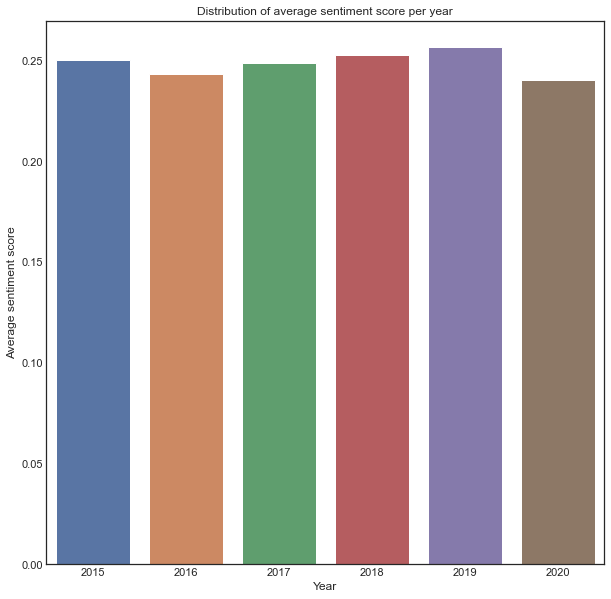

In [117]:
# plotting the distribution

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=data, x='year', y='mean_sentiment_score')
ax.set(title='Distribution of average sentiment score per year', 
           xlabel='Year', 
           ylabel='Average sentiment score')
plt.show()